# Preparation
*   DO NOT edit the cells in this section.
*   **!!! NOT REQUIRED to read or understand Python code the cell below!!!**
*   JUST READ and SEE the results (output text and picture)


In [ ]:
!gdown --id 1KSJ6rQRsM1DKY9PYXlJcvNHlSS2wTOgt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

alisttime_df = pd.read_csv('alisttime.csv')
print()
print('#'*80)
print('The first 3 data rows of alisttime.csv:')
print(alisttime_df.iloc[0:3])
print('#'*80)
print()

alisttime = alisttime_df.to_numpy()

fig = plt.figure(figsize=(15, 8))
plt.scatter(alisttime[:, 0],  alisttime[:,1], c='r', marker='d', alpha=0.9, label='add(0, *)')
plt.scatter(alisttime[:, 0],  alisttime[:,2], c='g', marker='s', alpha=0.9, label='add(*)')
plt.scatter(alisttime[:, 0],  alisttime[:,3], c='b', marker='o', alpha=0.9, label='add(k, *)')
plt.scatter(alisttime[:, 0],  alisttime[:,4], c='m', marker='<', alpha=0.9, label='removeAt(0)')
plt.scatter(alisttime[:, 0],  alisttime[:,5], c='y', marker='v', alpha=0.9, label='removeAt(n-1)')
plt.scatter(alisttime[:, 0],  alisttime[:,6], c='c', marker='>', alpha=0.9, label='removeAt(k)')
plt.scatter(alisttime[:, 0],  alisttime[:,7], c='navy', marker='^', alpha=0.9, label='get(k)')
plt.legend()
plt.title('Executation time of some methods of XArrayList')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
fig.savefig('xarraylist.jpeg')
plt.show()

Downloading...
From: https://drive.google.com/uc?id=1KSJ6rQRsM1DKY9PYXlJcvNHlSS2wTOgt
To: /content/dsastudents/xarraylist.png
100% 1.27k/1.27k [00:00<00:00, 2.50MB/s]


FileNotFoundError: ignored

In [ ]:
alisttime_df = pd.read_csv('alisttime.csv')
print()
print('#'*80)
print('Structures of CSV file: alisttime.csv')
print('#'*80)
alisttime_df.info()

# 1. Introduction

The figure presented above shows the executation time of some methods in XArrayList, see the legend.
* The horizontal axis corresponds to number of items (noted as **size** or **n**)  of the lists in the experiment; from the figure, **n** varies from 1 to one milion (10^6).
* The vertical axis is the executation time. 

We can make some conclusions as follows from the figure:
* **add(0,*)** and **removeAt(0)** are costly compared to the others; look for red diamons and mangenta triagles in the figure.
* **get(k)**, **add(*)**, **removeAt(n-1)** are really cheap, does not depend on the data size.

The figure is plotted using the data given in the **alisttime.csv** (downloaded from GDrive).**alisttime.csv** is a **CSV** file (text file). Its structure is given the above cell.
* **alisttime.csv** contains 8 collums with headers: **size**, **addfirst(ms)**, etc (see the above cell).
* the meaning of columns, exemplified for the first row:
    * size = 537993: the list in the experiment contains 537993 elements
    * addfirst(ms) = 0.001508: when the list containing 537993 elements, if we add **one more item** at index **0** then this operation completed within 0.001508 miliseconds.
    * removerandpos(ms) = 0.000714: when the list containing 537993 elements, if we remove **one item** at index **k** from the list then this operation completed within 0.000714 miliseconds.
      * **k** is a random index within range [0, **size-1**]
      * Actually, in order to determine the exec time of **removerandpos** we need to generate **k** **ntries** times; for examples, if **ntries =10**, we try with 10 random values of **k**.

The objective of this exercise is to develop a tool called **listimeit**. That tool will generate **CSV** file as given above.

# 2. How to timeit for list's operations
* **listimeit** must do **timeit** for lists having different sizes. The size of the list is the horizontal axis of the figure. 
  * The maximum length of lists in the figure is one milion; however, **listimeit** needs not to dertermine the executation time for every size from 1 to one milion.
  * **listitimeit** samples the size by uniform distribution within [1, **max_length**]; for example, if **max_length** is **10^6** then **size** is any random value within [1, **10^6**]
      * one sample (one value of **size**) generates one row in **CSV** file.
      * the total number of rows in **CSV** file can be controlled by a value **nsizes**
      * **max_length** and **nsizes** can be passed as command line arguments for **listimeit**, as follows
      > ./listtimeit -a filename.csv -nsizes 100 -max_length 1000000
      * With the command above:
        * **nsizes = 10**
        * **max_length=10^6**
        * **CSV** file is filename.csv
        * **-a** means: do **timeit** for X**A**rrayList
        * meanwhile, **-s** for **S**LinkedList and **-d** for **D**LinkedList

  * **for each size** in **nsizes**, listimeit has to determine executation time for the afore-mentioned methods: add, remove, get.
    * to obtain reliable estimation for times, **listtimeit** has to run each methods **nexec** times and take the averaged value for **nexec** tries. **nexec** can be also controlled via command line arguments, as follows:
    > ./listtimeit -a filename.csv -nsizes 100 -max_length 1000000 -nexec 20
    * The above command: **nexec=20** means that **listimeit** run each method 20 times and compute the averaged execution time.

Moreover, methods like **add(k,*)**, **removeAt(k)** and **get(k)**; where, **k** is a valid index, within [0, **size**]. **listtimeit** SHOUD NOT fix **k** to a static value. It SHOULD do sampling to get **k**. That means **k** is sampled from a uniform distribution [0, **size**].
  * How many values of **k** should be sampled can be controlled by a value named **ntries**, via command line, for examples.
    > ./listtimeit -a filename.csv -nsizes 100 -max_length 1000000 -nexec 20 -ntries 10
    * **listtimeit** will executes each method **add(k,*)**, **removeAt(k)** and **get(k)** [**nexec** x **ntries**] and return the averaged time. Within the command here, [**nexec** x **ntries**] = 20x10 = 200 tries.

# 3. Guidelines:
* [Samples for measuring executation time](https://en.cppreference.com/w/cpp/chrono/high_resolution_clock/now)
* Samping integers from a **uniform distribution**: use **genIntArray** in **util/ArrayLib.h** of **DSACPP**
```
int* genIntArray(int size, int minValue=0, int maxValue=100, 
               bool manualSeed=false, int seedValue=0)
```
For example: generate a random with uniform [1, 10000]
```
int* ptr = genIntArray(50, 1, 10000);
//use ptr here
//delete: when compelete
delete []ptr;
```




# 4. Coding
Fill your code in the following cell


In [1]:
##################################################################################
# DO NOT edit this cell
# MUST RUN this cell to download and prepare dsaframe for students
##################################################################################


!rm -f -r ./dsastudents
!gdown --id 1eFydXIiS8f_JCFXzAoLnIFo-fLH6UT2J
!unzip ./dsastudents.zip
%cd dsastudents

Downloading...
From: https://drive.google.com/uc?id=1eFydXIiS8f_JCFXzAoLnIFo-fLH6UT2J
To: /content/dsastudents.zip
100% 1.51M/1.51M [00:00<00:00, 89.9MB/s]
Archive:  ./dsastudents.zip
   creating: dsastudents/
  inflating: dsastudents/.dep.inc    
   creating: dsastudents/.vscode/
  inflating: dsastudents/.vscode/tasks.json  
  inflating: dsastudents/Makefile    
   creating: dsastudents/build/
   creating: dsastudents/build/Debug/
   creating: dsastudents/build/Debug/GNU-Linux/
   creating: dsastudents/build/Debug/GNU-Linux/dsacpp/
  inflating: dsastudents/build/Debug/GNU-Linux/dsacpp/dsa_main_test.o  
  inflating: dsastudents/build/Debug/GNU-Linux/dsacpp/dsa_main_test.o.d  
   creating: dsastudents/build/Debug/GNU-Linux/dsacpp/src/
   creating: dsastudents/build/Debug/GNU-Linux/dsacpp/src/geom/
  inflating: dsastudents/build/Debug/GNU-Linux/dsacpp/src/geom/Point3D.o  
  inflating: dsastudents/build/Debug/GNU-Linux/dsacpp/src/geom/Point3D.o.d  
  inflating: dsastudents/build/Debug/GNU

In [2]:
%%writefile listtimeit.cpp

#include <iostream>
#include <fstream>
#include <chrono>
using namespace std;
using namespace std::chrono;

#include "list/XArrayList.h"
#include "list/SLinkedList.h"
#include "list/DLinkedList.h"
#include "list/IList.h"
#include "util/ArrayLib.h"
#include <algorithm>

double Addbegin(IList<int>* plist, int size, int nexec){
    plist->clear();
    for(int idx = 0; idx < size; idx++){
        plist->add(idx);
    }
    double total = 0;
    for(int i=0; i<nexec;i++){
        auto start = high_resolution_clock::now();
        plist->add(0,999);
        auto end = high_resolution_clock::now();
        duration<double> diff = duration_cast<microseconds>(end - start);
        total += diff.count();
      
        plist->removeAt(size);
    }
    plist->clear();
    return total/nexec;
}
double Addend(IList<int>* plist,int size, int nexec){
    plist->clear();
    for(int idx = 0; idx < size; idx++){
        plist->add(idx);
    }
    double total = 0;
    for(int i=0; i<nexec;i++){
        auto start = high_resolution_clock::now();
        plist->add(999);
        auto end = high_resolution_clock::now();
        duration<double> diff = duration_cast<microseconds>(end - start);
        total += diff.count();
        plist->removeAt(size);
    }
    plist->clear();
    return total/nexec;
}
double Addram(IList<int>* plist,int size, int nexec, int ntries=10){
    plist->clear();
    for(int idx = 0; idx < size; idx++){
           plist->add(idx);
    }
    
    int* k = genIntArray(ntries, 0, size-1);
    double total = 0;
    for(int idx = 0; idx < ntries; idx++){
        for(int i=0; i<nexec;i++){
            auto start = high_resolution_clock::now();
            plist->add(k[idx],k[idx]);
            auto end = high_resolution_clock::now();
            duration<double> diff = duration_cast<microseconds> (end - start);
            total += diff.count();
            //remove to makesure that list always size elements, to calculate the same size list in nexec
            plist->removeAt(size);
        }
    }
    delete []k;
    plist->clear();
    return total/(nexec*ntries);
    }
double Removebegin(IList<int>* plist,int size, int nexec){
    plist->clear();
    for(int idx = 0; idx < size; idx++){
        plist->add(idx);
    }
    double total = 0;
    for(int i=0; i<nexec;i++){
        auto start = high_resolution_clock::now();
        plist->removeAt(0);
        auto end = high_resolution_clock::now();
        duration<double> diff = duration_cast<microseconds>(end - start);
        total += diff.count();
        //remove to makesure that list always size elements, to calculate the same size list in nexec
        plist->add(999);
    }
    plist->clear();
    return total/nexec;
}
double Removelast(IList<int>* plist,int size, int nexec){
    plist->clear();
    for(int idx = 0; idx < size; idx++){
        plist->add(idx);
    }
    double total = 0;
    for(int i=0; i<nexec;i++){
        auto start = high_resolution_clock::now();
        plist->removeAt(size-1);
        auto end = high_resolution_clock::now();
        duration<double> diff = duration_cast<microseconds>(end - start);
        total += diff.count();
        //remove to makesure that list always size elements, to calculate the same size list in nexec
        plist->add(999);
    }
    plist->clear();
    return total/nexec;
}
double Removeram(IList<int>* plist,int size, int nexec, int ntries=10){
    plist->clear();
    for(int idx = 0; idx < size; idx++){
           plist->add(idx);
    }
    
    int* k = genIntArray(ntries, 0, size-1);
    double total = 0;
    for(int idx = 0; idx < ntries; idx++){
        for(int i=0; i<nexec;i++){
            auto start = high_resolution_clock::now();
            plist->removeAt(k[idx]);
            auto end = high_resolution_clock::now();
            duration<double> diff = duration_cast<microseconds> (end - start);
            total += diff.count();
            //remove to makesure that list always size elements, to calculate the same size list in nexec
            plist->add(100);
        }
    }
    delete []k;
    plist->clear();
    return total/(nexec*ntries);
}

double getbegin(IList<int>* plist,int size, int nexec){
    plist->clear();
    for(int idx = 0; idx < size; idx++){
        plist->add(idx);
    }
    double total = 0;
    for(int i=0; i<nexec;i++){
        auto start = high_resolution_clock::now();
        plist->get(0);
        auto end = high_resolution_clock::now();
        duration<double> diff = duration_cast<microseconds>(end - start);
        total += diff.count();
    }
    plist->clear();
    return total/nexec;
}
double getlast(IList<int>* plist,int size, int nexec){
    plist->clear();
    for(int idx = 0; idx < size; idx++){
        plist->add(idx);
    }
    double total = 0;
    for(int i=0; i<nexec;i++){
        auto start = high_resolution_clock::now();
        plist->get(size -1);
        auto end = high_resolution_clock::now();
        duration<double> diff = duration_cast<microseconds>(end - start);
        total += diff.count();
    }
    plist->clear();
    return total/nexec;
}
double getram(IList<int>* plist,int size, int nexec, int ntries=10){
    plist->clear();
    for(int idx = 0; idx < size; idx++){
           plist->add(idx);
    }
    
    int* k = genIntArray(ntries, 0, size -1);
    double total = 0;
    for(int idx = 0; idx < ntries; idx++){
        for(int i=0; i<nexec;i++){
            auto start = high_resolution_clock::now();
            plist->get(k[idx]);
            auto end = high_resolution_clock::now();
            duration<double> diff = duration_cast<microseconds> (end - start);
            total += diff.count();
        }
    }
    delete []k;
    plist->clear();
    return total/(nexec*ntries);
}

/*
NOTE:
  * SHOULD define other functions to support the implementation of "meter"
  * Parameters: read the explanation presented above
*/
void meter(IList<int>* plist, string csvfile, int* ptr_sizes, int nsizes, int nexec=10, int ntries=10){
     //YOUR CODE HERE
    std::ofstream outfile;
    outfile.open(csvfile,std::ios::out | std::ios::app);
    outfile << "n" << ", " << "addfirst(ms)" << ", " <<  "addlast(ms)" << ", " <<  "addrandom(ms)" << ", " << "removefirst(ms)" << ", " <<  "removelast(ms)" << ", " <<  "removerandom(ms)" << ", "<<  "getfirst(ms)" << ", " <<  "getlast(ms)" << ", " << "getrandom(ms)" << endl;
    cout    <<"n"<<"\t ->"
            << fixed<<setw(12) << setprecision(8) << "add(0,*)" << ", "
            << fixed<<setw(12) << setprecision(8) << "add(*)" << ", "
            << fixed<<setw(12) << setprecision(8) << "add(k,*)" << ", "
            << fixed<<setw(12) << setprecision(8) << "removeAt(0)" << ", "
            << fixed<<setw(12) << setprecision(8) << "removeAt(n-1)" << ", "
            << fixed<<setw(12) << setprecision(8) << "removeAt(k)" << ", "
            << fixed<<setw(12) << setprecision(8) << "get(0)" << ", "
            << fixed<<setw(12) << setprecision(8) << "get(size-1)" << ", "
            << fixed<<setw(12) << setprecision(8) << "get(k)" << endl;
    for(int i=0; i<nsizes; i++){
        plist->clear();
        double addfisrt = Addbegin(plist,ptr_sizes[i],nexec);
        double addlast  = Addend(plist,ptr_sizes[i],nexec);
        double addramd = Addram(plist,ptr_sizes[i],nexec,ntries);
        double removefisrt = Removebegin(plist,ptr_sizes[i],nexec);
        double removelast = Removelast(plist,ptr_sizes[i],nexec);
        double removeramd = Removeram(plist,ptr_sizes[i],nexec,ntries);
        double getfirst = getbegin(plist,ptr_sizes[i],nexec);
        double getend = getlast(plist,ptr_sizes[i],nexec);
        double get = getram(plist,ptr_sizes[i],nexec,ntries);
        if(i%10 == 0)
        cout       <<ptr_sizes[i]<<"\t ->"
                   << fixed<<setw(12) << setprecision(8) << addfisrt << ", "
                   << fixed<<setw(12) << setprecision(8) << addlast << ", "
                   << fixed<<setw(12) << setprecision(8) << addramd << ", "
                   << fixed<<setw(12) << setprecision(8) << removefisrt << ", "
                   << fixed<<setw(12) << setprecision(8) << removelast << ", "
                   << fixed<<setw(12) << setprecision(8) << removeramd<< ", "
                   << fixed<<setw(12) << setprecision(8) << getfirst<< ", "
                   << fixed<<setw(12) << setprecision(8) << getend<< ", "
                   << fixed<<setw(12) << setprecision(8) << get <<endl;
        
        outfile    <<ptr_sizes[i]<<","
                   << fixed<<setw(12) << setprecision(8) << addfisrt << ", "
                   << fixed<<setw(12) << setprecision(8) << addlast << ", "
                   << fixed<<setw(12) << setprecision(8) << addramd << ", "
                   << fixed<<setw(12) << setprecision(8) << removefisrt << ", "
                   << fixed<<setw(12) << setprecision(8) << removelast << ", "
                   << fixed<<setw(12) << setprecision(8) << removeramd<< ", "
                   << fixed<<setw(12) << setprecision(8) << getfirst<< ", "
                   << fixed<<setw(12) << setprecision(8) << getend<< ", "
                   << fixed<<setw(12) << setprecision(8) << get <<endl;
    }
    cout<<"Done"<<endl;
    outfile.close();
}

/////////////////////////////////////////////////////////////////////////////
// YOUR ARE NOT REQUIRED TO CHANGE THE FOLLOWING FUNCTIONS
/////////////////////////////////////////////////////////////////////////////

int get_int(char** begin, char** end, const string& option, int _default){
    char** ptr = std::find(begin, end, option);
    if (ptr != end && ++ptr != end) return stoi(*ptr);
    else return _default;
}

string get_string(char** begin, char** end, const string& option, string _default){
    char** ptr = std::find(begin, end, option);
    if (ptr != end && ++ptr != end) return string(*ptr);
    else return _default;
}
bool option_exist(char** begin, char** end, const string& option){
    return std::find(begin, end, option) != end;
}

int main(int argc, char** argv){
    if(option_exist(argv, argv+argc, "-h")){
        cout << "Show help" << endl;
        return 0;
    }
    ///////////////////////////////////////////////////////////////////////////
    int nsizes, nexec, max_length, ntries;
    XArrayList<int> alist;
    SLinkedList<int> slist;
    DLinkedList<int> dlist;

    nsizes = get_int(argv, argv+argc, "-nsizes", 50);
    nexec = get_int(argv, argv+argc, "-nexec", 20);
    max_length = get_int(argv, argv+argc, "-max_length", 1000);
    ntries = get_int(argv, argv+argc, "-ntries", 10);
    int* ptr_sizes = genIntArray(nsizes, 1, max_length);
    
    //cout << nsizes << ", " << nexec << ", " << max_length << ", " << ntries << endl;
    if(option_exist(argv, argv+argc, "-a")){
        cout << endl;
        cout << "XArrayList: Time measurement" << endl;
        cout << string(80, '-') << endl;

        string filename = get_string(argv, argv+argc, "-a", "");
        meter(&alist, filename, ptr_sizes, nsizes, nexec, ntries);
    }
    if(option_exist(argv, argv+argc, "-s")){
        cout << endl;
        cout << "SLinkedList: Time measurement" << endl;
        cout << string(80, '-') << endl;

        string filename = get_string(argv, argv+argc, "-s", "");
        meter(&slist, filename, ptr_sizes, nsizes, nexec, ntries);
    }
    if(option_exist(argv, argv+argc, "-d")){
        cout << endl;
        cout << "DLinkedList: Time measurement" << endl;
        cout << string(80, '-') << endl;
        string filename = get_string(argv, argv+argc, "-d", "");
        meter(&dlist, filename, ptr_sizes, nsizes, nexec, ntries);
    }
    
}


Writing listtimeit.cpp


In [3]:
%%shell

#//////////////////////////////////////////////////////////////////////////////
#// DO NOT EDIT THIS CELL
#//////////////////////////////////////////////////////////////////////////////

rm -f listtimeit
INCLUDE=./dsacpp/include
SOURCE=./dsacpp/src
g++ -std=c++11 listtimeit.cpp $SOURCE/geom/*.cpp -I $INCLUDE -o listtimeit
rm -f alisttime.csv slisttime.csv dlisttime.csv
./listtimeit -a alisttime.csv -nsizes 100 -ntries 10 -nexec 20 -max_length 1000000
./listtimeit -d dlisttime.csv -nsizes 100 -ntries 10 -nexec 20 -max_length 1000000
./listtimeit -s slisttime.csv -nsizes 100 -ntries 10 -nexec 20 -max_length 1000000


XArrayList: Time measurement
--------------------------------------------------------------------------------
n	 ->    add(0,*),       add(*),     add(k,*),  removeAt(0), removeAt(n-1),  removeAt(k),       get(0),  get(size-1),       get(k)
454108	 ->  0.00134295,   0.00000000,   0.00074734,   0.00144000,   0.00000000,   0.00082785,   0.00000000,   0.00000000,   0.00000000
198281	 ->  0.00057655,   0.00000000,   0.00018877,   0.00063035,   0.00000000,   0.00024147,   0.00000000,   0.00000000,   0.00000000
757585	 ->  0.00222210,   0.00000000,   0.00103319,   0.00244015,   0.00000000,   0.00114084,   0.00000000,   0.00000000,   0.00000000
851324	 ->  0.00249980,   0.00000000,   0.00122914,   0.00271270,   0.00000000,   0.00133828,   0.00000000,   0.00000000,   0.00000000
890741	 ->  0.00279825,   0.00000000,   0.00111212,   0.00284035,   0.00000000,   0.00121774,   0.00000000,   0.00000000,   0.00000000
125342	 ->  0.00036650,   0.00000000,   0.00016502,   0.00039620,   0.00000000,   0

# New Section

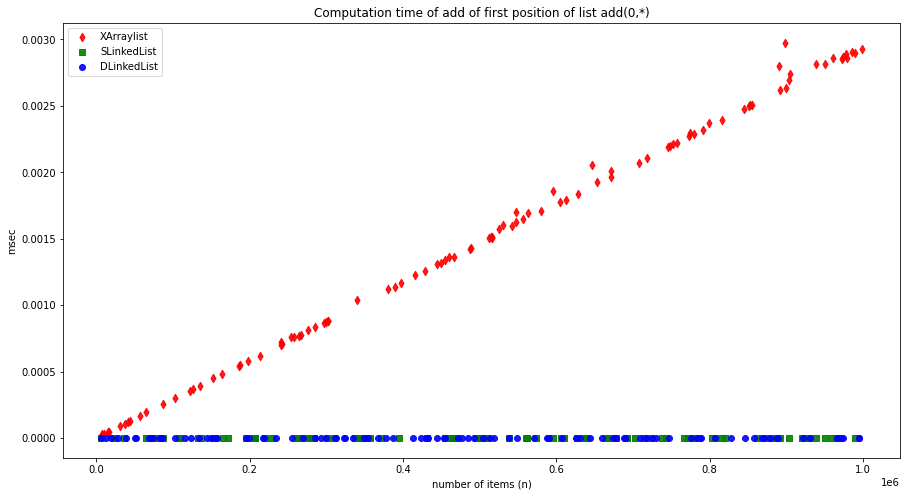

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

slisttime = pd.read_csv('slisttime.csv')
slisttime = slisttime.to_numpy()

dlisttime = pd.read_csv('dlisttime.csv')
dlisttime = dlisttime.to_numpy()

alisttime = pd.read_csv('alisttime.csv')
alisttime = alisttime.to_numpy()

plt.figure(figsize=(15,8))
plt.scatter(alisttime[:, 0],  alisttime[:,1], c='r', marker='d', alpha=0.9, label='XArraylist')
plt.scatter(slisttime[:, 0],  slisttime[:,1], c='g', marker='s', alpha=0.9, label='SLinkedList')
plt.scatter(dlisttime[:, 0],  dlisttime[:,1], c='b', marker='o', alpha=0.9, label='DLinkedList')

plt.legend()
plt.title('Computation time of add of first position of list add(0,*)')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
plt.savefig('addfirst.png')
plt.show()

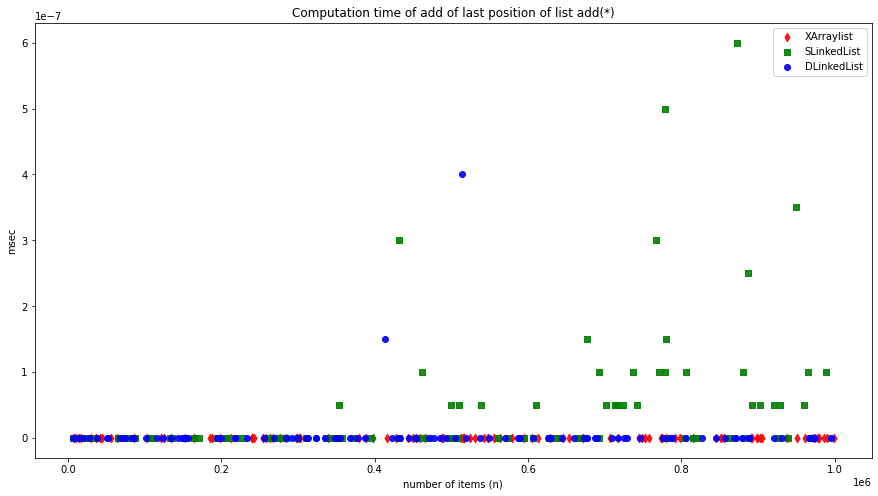

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

slisttime = pd.read_csv('slisttime.csv')
slisttime = slisttime.to_numpy()

dlisttime = pd.read_csv('dlisttime.csv')
dlisttime = dlisttime.to_numpy()

alisttime = pd.read_csv('alisttime.csv')
alisttime = alisttime.to_numpy()

plt.figure(figsize=(15,8))
plt.scatter(alisttime[:, 0],  alisttime[:,2], c='r', marker='d', alpha=0.9, label='XArraylist')
plt.scatter(slisttime[:, 0],  slisttime[:,2], c='g', marker='s', alpha=0.9, label='SLinkedList')
plt.scatter(dlisttime[:, 0],  dlisttime[:,2], c='b', marker='o', alpha=0.9, label='DLinkedList')

plt.legend()
plt.title('Computation time of add of last position of list add(*)')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
plt.savefig('addlast.png')
plt.show()

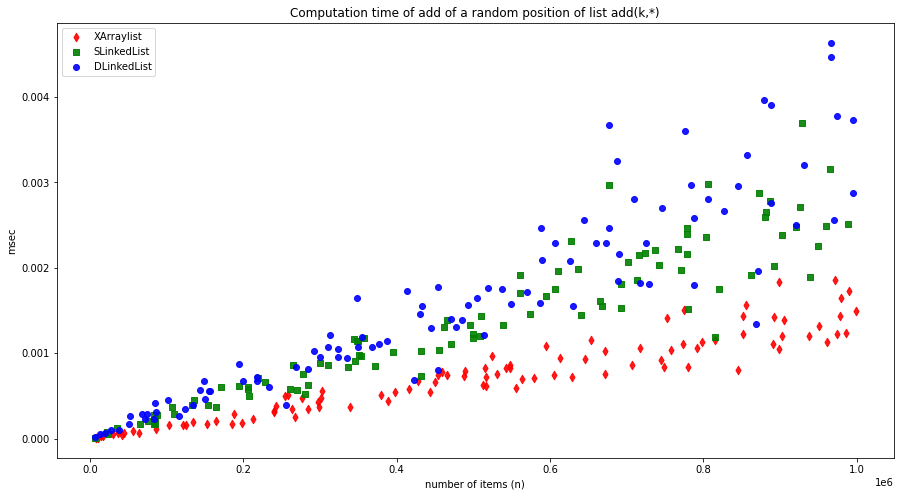

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

slisttime = pd.read_csv('slisttime.csv')
slisttime = slisttime.to_numpy()

dlisttime = pd.read_csv('dlisttime.csv')
dlisttime = dlisttime.to_numpy()

alisttime = pd.read_csv('alisttime.csv')
alisttime = alisttime.to_numpy()

plt.figure(figsize=(15,8))
plt.scatter(alisttime[:, 0],  alisttime[:,3], c='r', marker='d', alpha=0.9, label='XArraylist')
plt.scatter(slisttime[:, 0],  slisttime[:,3], c='g', marker='s', alpha=0.9, label='SLinkedList')
plt.scatter(dlisttime[:, 0],  dlisttime[:,3], c='b', marker='o', alpha=0.9, label='DLinkedList')

plt.legend()
plt.title('Computation time of add of a random position of list add(k,*)')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
plt.savefig('addrandom.png')
plt.show()

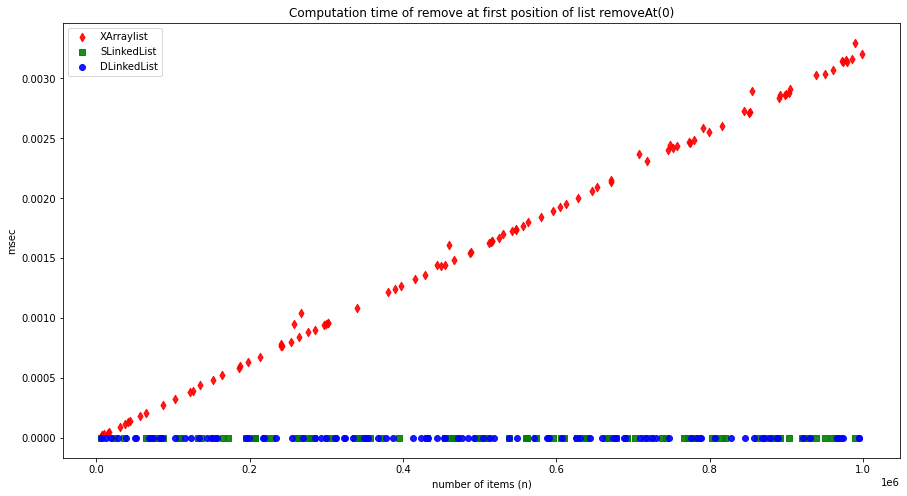

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

slisttime = pd.read_csv('slisttime.csv')
slisttime = slisttime.to_numpy()

dlisttime = pd.read_csv('dlisttime.csv')
dlisttime = dlisttime.to_numpy()

alisttime = pd.read_csv('alisttime.csv')
alisttime = alisttime.to_numpy()

plt.figure(figsize=(15,8))
plt.scatter(alisttime[:, 0],  alisttime[:,4], c='r', marker='d', alpha=0.9, label='XArraylist')
plt.scatter(slisttime[:, 0],  slisttime[:,4], c='g', marker='s', alpha=0.9, label='SLinkedList')
plt.scatter(dlisttime[:, 0],  dlisttime[:,4], c='b', marker='o', alpha=0.9, label='DLinkedList')

plt.legend()
plt.title('Computation time of remove at first position of list removeAt(0)')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
plt.savefig('removefirst.png')
plt.show()

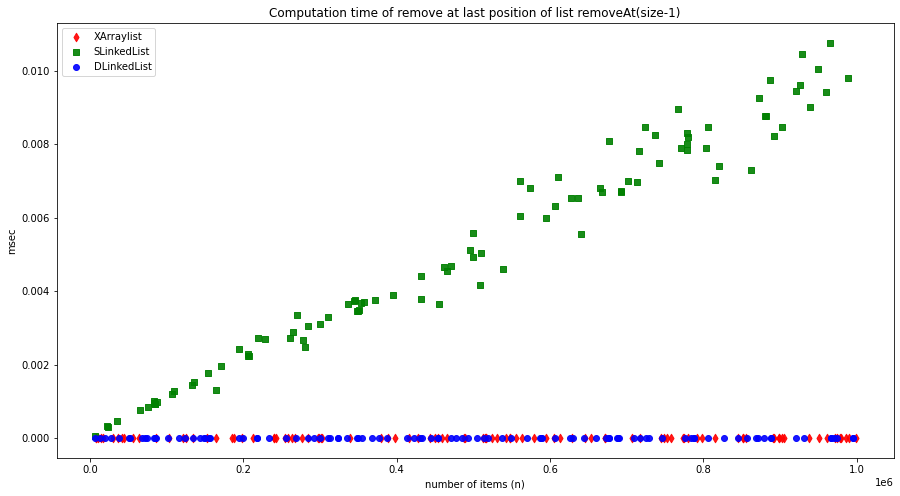

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

slisttime = pd.read_csv('slisttime.csv')
slisttime = slisttime.to_numpy()

dlisttime = pd.read_csv('dlisttime.csv')
dlisttime = dlisttime.to_numpy()

alisttime = pd.read_csv('alisttime.csv')
alisttime = alisttime.to_numpy()

plt.figure(figsize=(15,8))
plt.scatter(alisttime[:, 0],  alisttime[:,5], c='r', marker='d', alpha=0.9, label='XArraylist')
plt.scatter(slisttime[:, 0],  slisttime[:,5], c='g', marker='s', alpha=0.9, label='SLinkedList')
plt.scatter(dlisttime[:, 0],  dlisttime[:,5], c='b', marker='o', alpha=0.9, label='DLinkedList')

plt.legend()
plt.title('Computation time of remove at last position of list removeAt(size-1)')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
plt.savefig('removelast.png')
plt.show()

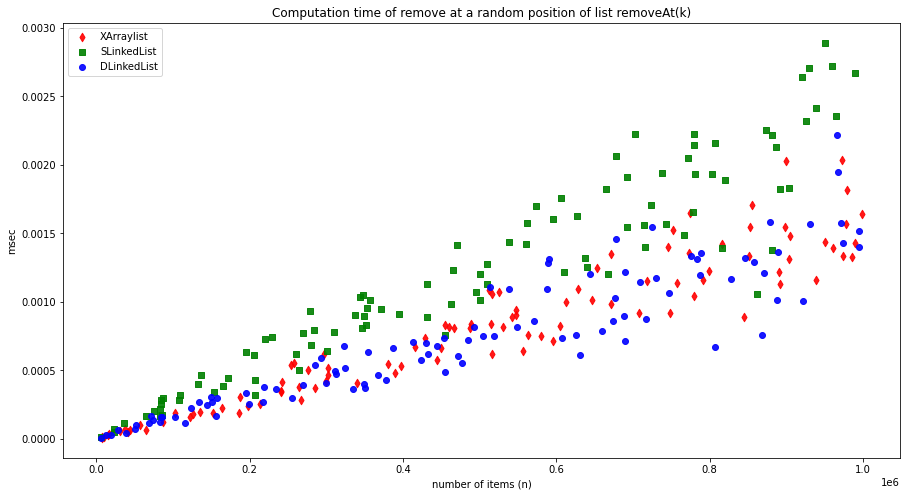

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

slisttime = pd.read_csv('slisttime.csv')
slisttime = slisttime.to_numpy()

dlisttime = pd.read_csv('dlisttime.csv')
dlisttime = dlisttime.to_numpy()

alisttime = pd.read_csv('alisttime.csv')
alisttime = alisttime.to_numpy()

plt.figure(figsize=(15,8))
plt.scatter(alisttime[:, 0],  alisttime[:,6], c='r', marker='d', alpha=0.9, label='XArraylist')
plt.scatter(slisttime[:, 0],  slisttime[:,6], c='g', marker='s', alpha=0.9, label='SLinkedList')
plt.scatter(dlisttime[:, 0],  dlisttime[:,6], c='b', marker='o', alpha=0.9, label='DLinkedList')

plt.legend()
plt.title('Computation time of remove at a random position of list removeAt(k)')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
plt.savefig('removerandom.png')
plt.show()

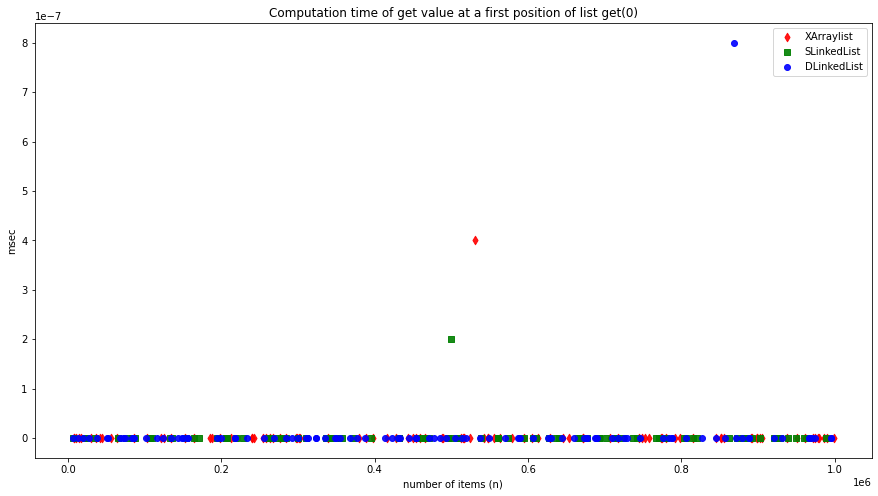

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

slisttime = pd.read_csv('slisttime.csv')
slisttime = slisttime.to_numpy()

dlisttime = pd.read_csv('dlisttime.csv')
dlisttime = dlisttime.to_numpy()

alisttime = pd.read_csv('alisttime.csv')
alisttime = alisttime.to_numpy()

plt.figure(figsize=(15,8))
plt.scatter(alisttime[:, 0],  alisttime[:,7], c='r', marker='d', alpha=0.9, label='XArraylist')
plt.scatter(slisttime[:, 0],  slisttime[:,7], c='g', marker='s', alpha=0.9, label='SLinkedList')
plt.scatter(dlisttime[:, 0],  dlisttime[:,7], c='b', marker='o', alpha=0.9, label='DLinkedList')

plt.legend()
plt.title('Computation time of get value at a first position of list get(0)')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
plt.savefig('getfirst.png')
plt.show()

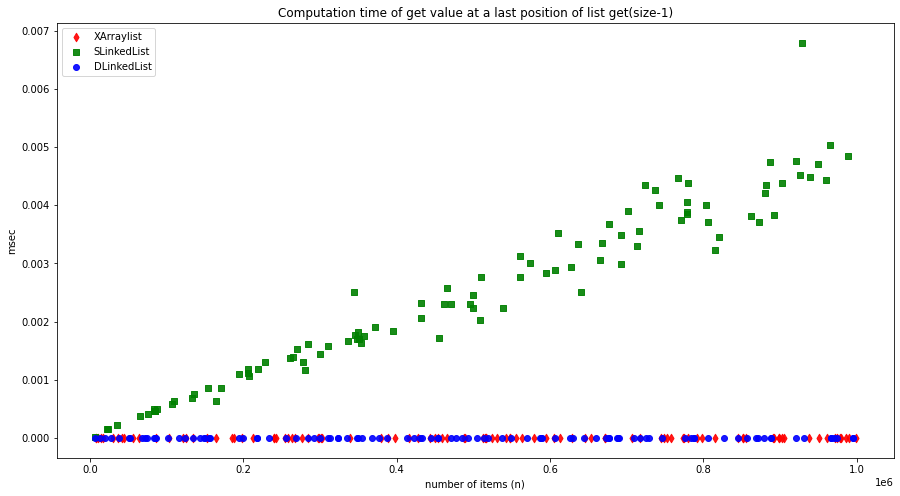

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

slisttime = pd.read_csv('slisttime.csv')
slisttime = slisttime.to_numpy()

dlisttime = pd.read_csv('dlisttime.csv')
dlisttime = dlisttime.to_numpy()

alisttime = pd.read_csv('alisttime.csv')
alisttime = alisttime.to_numpy()

plt.figure(figsize=(15,8))
plt.scatter(alisttime[:, 0],  alisttime[:,8], c='r', marker='d', alpha=0.9, label='XArraylist')
plt.scatter(slisttime[:, 0],  slisttime[:,8], c='g', marker='s', alpha=0.9, label='SLinkedList')
plt.scatter(dlisttime[:, 0],  dlisttime[:,8], c='b', marker='o', alpha=0.9, label='DLinkedList')

plt.legend()
plt.title('Computation time of get value at a last position of list get(size-1)')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
plt.savefig('getlast.png')
plt.show()

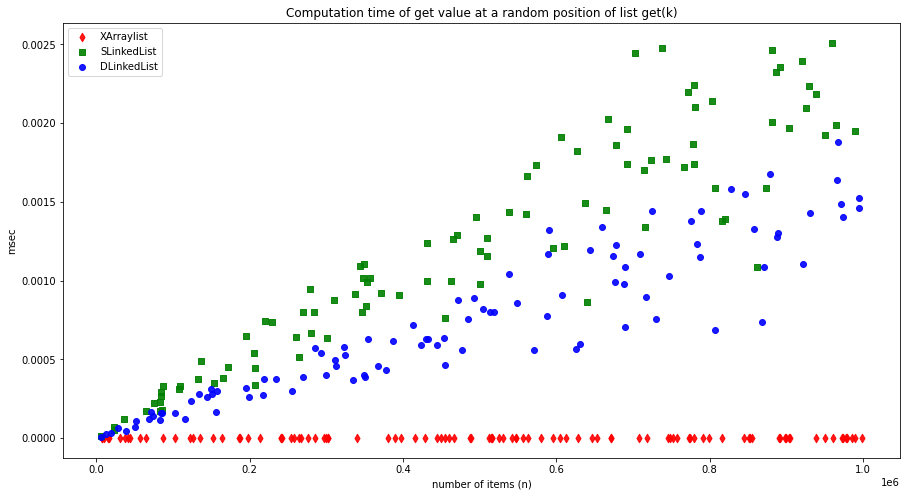

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

slisttime = pd.read_csv('slisttime.csv')
slisttime = slisttime.to_numpy()

dlisttime = pd.read_csv('dlisttime.csv')
dlisttime = dlisttime.to_numpy()

alisttime = pd.read_csv('alisttime.csv')
alisttime = alisttime.to_numpy()

plt.figure(figsize=(15,8))
plt.scatter(alisttime[:, 0],  alisttime[:,9], c='r', marker='d', alpha=0.9, label='XArraylist')
plt.scatter(slisttime[:, 0],  slisttime[:,9], c='g', marker='s', alpha=0.9, label='SLinkedList')
plt.scatter(dlisttime[:, 0],  dlisttime[:,9], c='b', marker='o', alpha=0.9, label='DLinkedList')

plt.legend()
plt.title('Computation time of get value at a random position of list get(k)')
plt.xlabel('number of items (n)')
plt.ylabel('msec')
plt.savefig('getrandom.png')
plt.show()